<a href="https://colab.research.google.com/github/colin-hehir/Machine-Learning-Predicting-Media-Memorability/blob/main/Colin_Hehir_20213371_predicting_memorability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CA684 Machine Learning - Media Memorability Assignment**

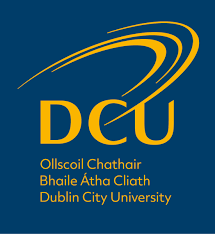

*Name:* Colin Hehir

*Student ID:* 20213371

*Programme:* MSc in Computing, Data Analytics

*Email:* colin.hehir3@mail.dcu.ie

### ***Problem/Task Description From MediaEval’s webpage***

This task focuses on the problem of predicting how memorable a video is to viewers. It requires participants to automatically predict memorability scores for videos that reflect the probability a video will be remembered. Task participants are provided with an extensive dataset of videos that are accompanied by memorability annotations, as well as pre-extracted state-of-the-art visual features. The ground truth has been collected
through recognition tests, and thus results from objective measurement of memory
performance. Participants will be required to train computational models capable of inferring video memorability from visual content. **Descriptive titles (Captions) attached to the videos may not be used.** Models will be evaluated through standard evaluation metrics used in ranking tasks (Spearman’s rank correlation).

### **Table of Contents of Colab Notebook**

*   1) Library Installation
*   2) Library Importation
*   3) Video Frame Extraction
*   4) Ground Truth and Spearman Correlation Function
*   5) HMP Feature
*   6) C3D Feature
*   7) ResNet152 Feature
*   8) Weighted Average Ensemble Model
*   9) Test-Set Models Implemenation
*   10) Test-Set Ground-Truth Prediction
*   11) References


















# **1) Library Installation**

*   Mount the Google Drive to Google Colab and appropriate working directory.
*   List available files.
*   Install progress bar.

In [ ]:
# Mount the Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/drive/')

# Provides functions for interacting with the operating system and changes the current working directory to the given path.
import os
os.chdir('/content/drive/My Drive')

# List available files.
!ls

# Provides a progress bar and a percentage indicator object that let you track the progress of a loop structure or other iterative computation.
!pip install pyprind

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 CA659	 CA684	 CA684_Assignment  'Colab Notebooks'  'Misc Files'


#**2) Library Importation**

*   Import all the necessary libraries and classes needed to complete the assignment including open-source software libraries that provides a Python interface.

In [ ]:
# Imports a library of the current namespace, but rather than using the name pandas, it's instructed to use the name pd instead.
import pandas as pd

# Imports a library of the current namespace, but rather than using the name numpy, it's instructed to use the name np instead.
import numpy as np

# Imports a library where a pre-initialized string can be used as a string constant.
from string import punctuation

# Imports a library that provides a progress bar and a percentage indicator object.
!pip install pyprind
import pyprind
import progressbar

# Imports a library that provides a container keeps track of how many times equivalent values are added.
from collections import Counter

# Imports a library that provides a collection of command style functions that make matplotlib work like MATLAB.
import matplotlib.pyplot as plt

# Imports a library that makes the random numbers predictable.
from numpy.random import seed
seed(1)

# Imports a library that offers classes representing filesystem paths with semantics appropriate for different operating systems.
from pathlib import Path

# Imports a library that provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.
import sys

# Imports a library that allows a hierarchical configuration scheme.
!pip install config
import config

# Imports a library that provides a wrapper package for OpenCV python bindings.
import cv2

# Imports a library that allows you to open an HDF5 file for reading.
import h5py

# Imports Python Imaging Library, need the 5.3.0 version.
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)

# Imports open-source library developed by Google primarily for deep learning applications.
import tensorflow

# Sets the global random seed.
tensorflow.random.set_seed(1)

# Imports built-in regularizers.
from tensorflow.python.keras import regularizers

# Imports a class that allows to vectorize a text corpus.
from tensorflow.python.keras.preprocessing.text import Tokenizer

# Imports a model that is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow.python.keras import Sequential

# Improrts a class from which all layers inherit.
from tensorflow.python.keras import layers

# Improrts a class for Linear Regression.
from sklearn.linear_model import LinearRegression

# Improrts a class for KNN Regression.
from sklearn.neighbors import KNeighborsRegressor

# Improrts a class for Random Forest Regression.
from sklearn.ensemble import RandomForestRegressor

# Improrts a class for Decision Tree Regression.
from sklearn.tree import DecisionTreeRegressor

# Improrts a class for Bayesian Ridge Regression.
from sklearn.linear_model import BayesianRidge

# Improrts a class for Support Vector Regression.
from sklearn.svm import SVR

# Imports a class that split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# Imports Keras which offers consistent & simple APIs.
import keras

# Imports utilities for ImageNet data preprocessing & prediction decoding.
from keras.applications import imagenet_utils

# Imports a class that converts a PIL Image instance to a Numpy array.
from keras.preprocessing.image import img_to_array

# Imports a class that loads an image into PIL format.
from keras.preprocessing.image import load_img

# Imports layers which are the basic building blocks of neural networks in Keras. 
from keras import layers

# Imports a class that offers densely-connected NN layers.
from keras.layers import Dense

# Imports a class that applies dropout to the input.
from keras.layers import Dropout

# Imports a class that groups a linear stack of layers into a tensorflow keras model.
from keras.models import Sequential

# Imports a gradient descent optimizer.
from keras.optimizers import SGD

# Imports a class that stops training when a monitored metric has stopped improving.
from keras.callbacks import EarlyStopping

5.3.0


#**3) Video Frame Extraction**

*   Extract frames from each of the videos from the Complete_Sources folder.
*   Save each of the 8 frames per video as a .jpg file.

In [ ]:
# Directory of where all the videos are stored on Google Drive.
Complete_Video_Sources = '/content/drive/My Drive/CA684_Assignment/Complete_Sources'

# List all the videos are stored on Google Drive.
Videos = os.listdir(Complete_Video_Sources)

# Directory of where all frames from the videos will be stored on Google Drive.
Video_Frames = '/content/drive/My Drive/CA684/Complete_Sources_Frames'

In [ ]:
# Defining a function to extract frames for videos.

def extract_video_frames(Videos, Complete_Video_Sources, Video_Frames):
    """ Images from clips collected and saved. """

    for Video_ID in Videos:
        
        # Directory path to files of where videos are stored.
        Video_Directory = os.path.join(Complete_Video_Sources, Video_ID)

        # Removing the file extension from each video.
        Video_Number = Video_ID.split('.webm')[0]

        # If a video file does not exist, error message appears and continues to next video.
        if not os.path.isfile(Video_Directory):
            print('There is no such record {}.'.format(Video_Directory))
            continue

        print('Record {} being read'.format(Video_Directory))

        # Reads the video clip.
        success = True
        video = cv2.VideoCapture(Video_Directory)
        success, image = video.read()

        # Identifies frame number.
        Frame_Number = int(video.get(1))
       
        # Create a file for each frame number per video.
        cv2.imwrite("{}/{}-frame-{}.jpg".format(Video_Frames, Video_Number, Frame_Number), image)
        
        # Frames per second.
        Frames_Per_Second = int(video.get(cv2.CAP_PROP_FPS))
        
        # For every second, one frame is collected.
        seconds = 1
        multiplier = Frames_Per_Second * seconds

        while success:

            # Identifies frame number.
            Frame_Number = int(video.get(1))

            if Frame_Number % multiplier == 0:
                # Saves the file for each frame number per video.
                cv2.imwrite("{}/{}-frame-{}.jpg".format(Video_Frames, Video_Number, Frame_Number), image)

            # Reads the video.
            success, image = video.read()
        # Release the acquired lock for the videos.
        video.release()

In [ ]:
# Calling the previous function with defined input parameters.
extract_video_frames(Videos, Complete_Video_Sources, Video_Frames)

Streaming output truncated to the last 5000 lines.
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video142.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video8829.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video6134.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video4109.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video3067.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video9190.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video4258.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video6265.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video643.webm being read
Record /content/drive/My Drive/CA684_Assignment/Complete_Sources/video7927.webm being read
Record /content/drive/My Drive/CA684_Assi

# **4) Ground Truth and Spearman Correlation Function**

*   Get the Ground-Truth data for the Dev-Set where the actual memorability scores for the videos are stored.
*   Define the Spearmann's Correlation Coefficient function to assesses how well the relationship between the predicted and actual memorability scores can be described.

In [ ]:
#Load the Ground-Truth dataset for respective videos.
Ground_truth_csv_path ='/content/drive/My Drive/CA684_Assignment/Dev-set/Ground-truth/ground-truth.csv'
Ground_truth_dataset = pd.read_csv(Ground_truth_csv_path)

In [ ]:
# Function that returns the first n rows for the object based on position to quickly test if object has the right type of data in it.
Ground_truth_dataset.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [ ]:
# Defining the function to calculate the Spearmann's Correlation Coefficient.
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

# **5) HMP Feature**

*   The feature is the histogram of motion patterns for each video.
*   Models used:

    > - Bayesian Ridge Regression.

    > - Support Vector Regression.

In [ ]:
# Define HMP feature function. 
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # Due to being 6075 bins, it is filled with zeros.
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

In [ ]:
# Create dataframe with a video and arrayInfo column.
HMP_Dev_DF = pd.DataFrame(columns = ['video', 'arrayInfo'])

# Directory of where the HMP feature is on Google Drive.
HMP_Dev_Dir = '/content/drive/My Drive/CA684_Assignment/Dev-set/HMP'

# Read through HMP features files in directory and update dataframe with respective array values.
for filename in os.listdir(HMP_Dev_Dir):
    if filename.endswith(".txt"):
        path = os.path.join(HMP_Dev_Dir, filename)
        array = read_HMP(path)
        fileName= filename.replace(".txt",".webm")
        HMP_Dev_DF = HMP_Dev_DF.append({'video': fileName, 'arrayInfo': array}, ignore_index=True)
    else:
        break

In [ ]:
# Returns the column labels.
HMP_Dev_DF.columns

# Function that returns the first n rows for the object based on position to quickly test if object has the right type of data in it.
HMP_Dev_DF.head()

,video,arrayInfo
0,video6634.webm,"[0.012099, 0.001466, 1.7e-05, 0.0, 0.000683, 7..."
1,video6633.webm,"[0.07817, 0.013597, 0.000122, 0.0, 0.00559, 7...."
2,video6639.webm,"[0.112506, 0.014053, 0.000263, 0.0, 0.043205, ..."
3,video6635.webm,"[0.066072, 0.012682, 0.000283, 0.0, 0.006425, ..."
4,video6637.webm,"[0.03036, 0.005834, 0.000169, 0.0, 0.006578, 0..."


In [ ]:
# Merge the HMP features and Ground Truth dataframes by the video column.
HMPDev_GroundTruth_DF = HMP_Dev_DF.merge(Ground_truth_dataset,on=["video"],how="inner")

# Returns the column labels.
HMPDev_GroundTruth_DF.columns

# Function that returns the first n rows for the object based on position to quickly test if object has the right type of data in it.
HMPDev_GroundTruth_DF.head()

,video,arrayInfo,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video6634.webm,"[0.012099, 0.001466, 1.7e-05, 0.0, 0.000683, 7...",0.743,33,0.727,11
1,video6633.webm,"[0.07817, 0.013597, 0.000122, 0.0, 0.00559, 7....",0.804,33,0.727,11
2,video6639.webm,"[0.112506, 0.014053, 0.000263, 0.0, 0.043205, ...",0.645,32,0.800,20
3,video6635.webm,"[0.066072, 0.012682, 0.000283, 0.0, 0.006425, ...",0.806,33,0.923,13
4,video6637.webm,"[0.03036, 0.005834, 0.000169, 0.0, 0.006578, 0...",0.865,34,0.786,14


In [ ]:
# Creates a new array with specified shape.
HMPDevDF_ResultArray = np.empty((0, 6075))

# Adds arrayInfo from HMP feature dataframe to previously created array.
for line in HMP_Dev_DF['arrayInfo']:
    HMPDevDF_ResultArray = np.append(HMPDevDF_ResultArray, np.array([line]), axis = 0)

In [ ]:
# Rename array, call type and produce output.
X_HMPArray = HMPDevDF_ResultArray
print(type(X_HMPArray))
X_HMPArray

<class 'numpy.ndarray'>


array([[1.20990e-02, 1.46600e-03, 1.70000e-05, ..., 1.35000e-04,
        1.11000e-04, 7.60000e-05],
       [7.81700e-02, 1.35970e-02, 1.22000e-04, ..., 5.20000e-05,
        8.20000e-05, 6.10000e-05],
       [1.12506e-01, 1.40530e-02, 2.63000e-04, ..., 2.85000e-04,
        5.04000e-04, 1.79000e-04],
       ...,
       [7.80100e-03, 3.51500e-03, 2.65000e-04, ..., 3.20000e-04,
        1.31600e-03, 1.16000e-04],
       [1.27840e-02, 2.92300e-03, 3.20000e-05, ..., 1.56000e-04,
        2.85000e-04, 2.78000e-04],
       [2.95240e-02, 6.14400e-03, 1.69000e-04, ..., 2.43000e-04,
        3.77000e-04, 3.32000e-04]])

In [ ]:
# Defining the targets for HMP feature.
Y_HMP = HMPDev_GroundTruth_DF[['short-term_memorability','long-term_memorability']].values  
Y_HMP_short = HMPDev_GroundTruth_DF[['short-term_memorability']].values
Y_HMP_long = HMPDev_GroundTruth_DF[['long-term_memorability']].values

# Defining the inputs for HMP feature.
X_HMP = X_HMPArray 

In [ ]:
# Slice notation for the inputs and targets of both short and long term memorability.
Short_X_HMP_train = X_HMP[0:6000]
Long_X_HMP_train = X_HMP[0:6000]
Short_X_HMP_test = X_HMP[6000:]
Long_X_HMP_test = X_HMP[6000:]
Short_Y_HMP_train = Y_HMP_short[0:6000]
Long_Y_HMP_train = Y_HMP_long[0:6000]

In [ ]:
# Splitting up our data into training and test sets between the inputs (X) and the targets (Y) for both short and long term instances.
Short_X_HMP_train,Short_X_HMP_test,Short_Y_HMP_train,Short_Y_HMP_test = train_test_split(X_HMP,Y_HMP_short,test_size=0.1,random_state=40)
Long_X_HMP_train,Long_X_HMP_test,Long_Y_HMP_train,Long_Y_HMP_test = train_test_split(X_HMP,Y_HMP_long,test_size=0.1,random_state=40)

In [ ]:
# Getting the shape of each array so we can see each size is appropriate.
print('Short_X_HMP_train', Short_X_HMP_train.shape)
print('Short_X_HMP_test', Short_X_HMP_test.shape)
print('Short_Y_HMP_train', Short_Y_HMP_train.shape)
print('Short_Y_HMP_test', Short_Y_HMP_test.shape)
print('Long_X_HMP_train', Long_X_HMP_train.shape)
print('Long_X_HMP_test', Long_X_HMP_test.shape)
print('Long_Y_HMP_train', Long_Y_HMP_train.shape)
print('Long_Y_HMP_test', Long_Y_HMP_test.shape)

Short_X_HMP_train (5400, 6075)
Short_X_HMP_test (600, 6075)
Short_Y_HMP_train (5400, 1)
Short_Y_HMP_test (600, 1)
Long_X_HMP_train (5400, 6075)
Long_X_HMP_test (600, 6075)
Long_Y_HMP_train (5400, 1)
Long_Y_HMP_test (600, 1)


In [ ]:
# Assigning the short term variable as Bayesian Ridge Regression.
Short_HMP_BayesianRidgeRegressor = BayesianRidge()
# Assigning the long term variable as Bayesian Ridge Regression.
Long_HMP_BayesianRidgeRegressor = BayesianRidge()

# Fitting the HMP short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_HMP_BayesianRidgeRegressor.fit(Short_X_HMP_train, Short_Y_HMP_train.ravel())
Long_HMP_BayesianRidgeRegressor.fit(Long_X_HMP_train,Long_Y_HMP_train.ravel())

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
# Predicting the HMP short and long term feature from the input test set on the target test set. 
Short_HMP_BayesianRidgePred = Short_HMP_BayesianRidgeRegressor.predict(Short_X_HMP_test)
Long_HMP_BayesianRidgePred = Long_HMP_BayesianRidgeRegressor.predict(Long_X_HMP_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the HMP feature -
# - using Bayesian Ridge Regression with default parameters.
Get_score(Short_HMP_BayesianRidgePred, Short_Y_HMP_test)

The Spearman's correlation coefficient is: 0.274


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the HMP feature -
# - using Bayesian Ridge Regression with default parameters.
Get_score(Long_HMP_BayesianRidgePred, Long_Y_HMP_test)

The Spearman's correlation coefficient is: 0.160


In [ ]:
# Assigning the short term variable as Support Vector Regression with default parameters.
Short_HMP_SVMRegressor = SVR()
# Assigning the long term variable as Support Vector Regression with default parameters.
Long_HMP_SVMRegressor = SVR()

# Fitting the HMP short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_HMP_SVMRegressor.fit(Short_X_HMP_train, Short_Y_HMP_train.ravel())
Long_HMP_SVMRegressor.fit(Long_X_HMP_train,Long_Y_HMP_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the HMP short and long term feature from the input test set on the target test set. 
Short_HMP_SVMPred = Short_HMP_SVMRegressor.predict(Short_X_HMP_test)
Long_HMP_SVMPred = Long_HMP_SVMRegressor.predict(Long_X_HMP_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the HMP feature -
# - using Support Vector Regression with default parameters.
Get_score(Short_HMP_SVMPred, Short_Y_HMP_test)

The Spearman's correlation coefficient is: 0.232


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the HMP feature -
# - using Support Vector Regression with default parameters.
Get_score(Long_HMP_SVMPred, Long_Y_HMP_test)

The Spearman's correlation coefficient is: 0.118


In [ ]:
# Assigning the short term variable as Support Vector Regression with tuned parameters.
Short_HMP_SVMRegressorTuned = SVR(kernel='linear', C=100.0, epsilon=0.001, gamma='scale')
# Assigning the short term variable as Support Vector Regression with tuned parameters.
Long_HMP_SVMRegressorTuned = SVR(kernel='linear', C=100.0, epsilon=0.001, gamma='scale')

# Fitting the HMP short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_HMP_SVMRegressorTuned.fit(Short_X_HMP_train, Short_Y_HMP_train.ravel())
Long_HMP_SVMRegressorTuned.fit(Long_X_HMP_train,Long_Y_HMP_train.ravel())

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the HMP short and long term feature from the input test set on the target test set. 
Short_HMP_SVMTunedPred = Short_HMP_SVMRegressorTuned.predict(Short_X_HMP_test)
Long_HMP_SVMTunedPred = Long_HMP_SVMRegressorTuned.predict(Long_X_HMP_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the HMP feature -
# - using Support Vector Regression with tuned parameters.
Get_score(Short_HMP_SVMTunedPred, Short_Y_HMP_test)

The Spearman's correlation coefficient is: 0.267


In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the HMP feature -
# - using Support Vector Regression with tuned parameters.
Get_score(Long_HMP_SVMTunedPred, Long_Y_HMP_test)

The Spearman's correlation coefficient is: 0.153


# **6) C3D Feature**

*   The feature is the final classification layer of the C3D model.
*   Models used:

    > - Bayesian Ridge Regression.

    > - Support Vector Regression.

In [ ]:
# Define C3D feature function.
def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

In [ ]:
# Create dataframe with a video and arrayInfo column.
C3D_Dev_DF = pd.DataFrame(columns = ['video', 'arrayInfo'])

# Directory of where the HMP feature is on Google Drive.
C3D_DEV_Dir = '/content/drive/My Drive/CA684_Assignment/Dev-set/C3D'

# Read through HMP features files in directory and update dataframe with respective array values.
for filename in os.listdir(C3D_DEV_Dir):
    if filename.endswith(".txt"):
        path = os.path.join(C3D_DEV_Dir, filename)
        array = read_C3D(path)
        fileName= filename.replace(".txt",".webm")
        C3D_Dev_DF = C3D_Dev_DF.append({'video': fileName, 'arrayInfo': array}, ignore_index=True)
    else:
        break

In [ ]:
# Returns the column labels.
C3D_Dev_DF.columns

# Function that returns the first n rows for the object based on position to quickly test if object has the right type of data in it.
C3D_Dev_DF.head()

,video,arrayInfo
0,video6632.webm,"[0.01085767, 0.01038633, 0.0, 0.0, 0.0, 0.0, 2..."
1,video6634.webm,"[0.00019951, 6.494e-05, 0.9938069, 2e-07, 4.7e..."
2,video6633.webm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,video6645.webm,"[0.00595937, 0.00476483, 0.00375688, 0.0005787..."
4,video6643.webm,"[0.00578192, 0.00030562, 0.00401076, 1.007e-05..."


In [ ]:
# Merge the C3D features and Ground Truth dataframes by the video column.
C3DDev_GroundTruth_DF = C3D_Dev_DF.merge(Ground_truth_dataset,on=["video"],how="inner")

# Returns the column labels.
C3DDev_GroundTruth_DF.columns

# Function that returns the first n rows for the object based on position to quickly test if object has the right type of data in it.
C3DDev_GroundTruth_DF.head()

,video,arrayInfo,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video6632.webm,"[0.01085767, 0.01038633, 0.0, 0.0, 0.0, 0.0, 2...",0.884,31,0.900,10
1,video6634.webm,"[0.00019951, 6.494e-05, 0.9938069, 2e-07, 4.7e...",0.743,33,0.727,11
2,video6633.webm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.804,33,0.727,11
3,video6645.webm,"[0.00595937, 0.00476483, 0.00375688, 0.0005787...",0.692,34,0.667,18
4,video6643.webm,"[0.00578192, 0.00030562, 0.00401076, 1.007e-05...",0.873,36,0.700,10


In [ ]:
# Creates a new array with specified shape.
C3DDevDF_ResultArray = np.empty((0, 101))

# Adds arrayInfo from C3D feature dataframe to previously created array.
for line in C3D_Dev_DF['arrayInfo']:
    C3DDevDF_ResultArray = np.append(C3DDevDF_ResultArray, np.array([line]), axis = 0)

In [ ]:
# Rename array, call type and produce output.
X_C3DArray = C3DDevDF_ResultArray
print(type(X_C3DArray))
X_C3DArray

<class 'numpy.ndarray'>


array([[1.0857670e-02, 1.0386330e-02, 0.0000000e+00, ..., 1.3000000e-06,
        2.6000000e-06, 8.0000000e-08],
       [1.9951000e-04, 6.4940000e-05, 9.9380690e-01, ..., 1.5000000e-07,
        8.3000000e-07, 1.0600000e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 7.1200000e-06],
       ...,
       [3.0822000e-04, 2.0097560e-02, 2.0226000e-04, ..., 1.0275000e-04,
        4.0909850e-02, 4.4673800e-03],
       [1.0868380e-02, 9.4189000e-04, 6.6393300e-03, ..., 2.6109700e-02,
        1.9424398e-01, 6.3640000e-05],
       [1.6464800e-03, 7.2505000e-04, 1.3462000e-04, ..., 6.5269600e-03,
        5.7053000e-04, 4.9473000e-03]])

In [ ]:
# Defining the targets for C3D feature.
Y_C3D = C3DDev_GroundTruth_DF[['short-term_memorability','long-term_memorability']].values  
Y_C3D_short = C3DDev_GroundTruth_DF[['short-term_memorability']].values
Y_C3D_long = C3DDev_GroundTruth_DF[['long-term_memorability']].values

# Defining the inputs for C3D feature.
X_C3D = X_C3DArray 

In [ ]:
# Slice notation for the inputs and targets of both short and long term memorability.
Short_X_C3D_train = X_C3D[0:6000]
Long_X_C3D_train = X_C3D[0:6000]
Short_X_C3D_test = X_C3D[6000:]
Long_X_C3D_test = X_C3D[6000:]
Short_Y_C3D_train = Y_C3D_short[0:6000]
Long_Y_C3D_train = Y_C3D_long[0:6000]

In [ ]:
# Splitting up our data into training and test sets between the inputs (X) and the targets (Y) for both short and long term instances.
Short_X_C3D_train,Short_X_C3D_test,Short_Y_C3D_train,Short_Y_C3D_test = train_test_split(X_C3D,Y_C3D_short,test_size=0.1,random_state=40)
Long_X_C3D_train,Long_X_C3D_test,Long_Y_C3D_train,Long_Y_C3D_test = train_test_split(X_C3D,Y_C3D_long,test_size=0.1,random_state=40)

In [ ]:
# Getting the shape of each array so we can see each size is appropriate.
print('Short_X_C3D_train', Short_X_C3D_train.shape)
print('Short_X_C3D_test', Short_X_C3D_test.shape)
print('Short_Y_C3D_train', Short_Y_C3D_train.shape)
print('Short_Y_C3D_test', Short_Y_C3D_test.shape)
print('Long_X_C3D_train', Long_X_C3D_train.shape)
print('Long_X_C3D_test', Long_X_C3D_test.shape)
print('Long_Y_C3D_train', Long_Y_C3D_train.shape)
print('Long_Y_C3D_test', Long_Y_C3D_test.shape)

Short_X_C3D_train (5400, 101)
Short_X_C3D_test (600, 101)
Short_Y_C3D_train (5400, 1)
Short_Y_C3D_test (600, 1)
Long_X_C3D_train (5400, 101)
Long_X_C3D_test (600, 101)
Long_Y_C3D_train (5400, 1)
Long_Y_C3D_test (600, 1)


In [ ]:
# Assigning the short term variable as Support Vector Regression with default parameters.
Short_C3D_SVMRegressor = SVR()
# Assigning the long term variable as Support Vector Regression with default parameters.
Long_C3D_SVMRegressor = SVR()

# Fitting the C3D short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_C3D_SVMRegressor.fit(Short_X_C3D_train, Short_Y_C3D_train.ravel())
Long_C3D_SVMRegressor.fit(Long_X_C3D_train,Long_Y_C3D_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the C3D short and long term feature from the input test set on the target test set. 
Short_C3D_SVMPred = Short_C3D_SVMRegressor.predict(Short_X_C3D_test)
Long_C3D_SVMPred = Long_C3D_SVMRegressor.predict(Long_X_C3D_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the C3D feature -
# - using Support Vector Regression with default parameters.
Get_score(Short_C3D_SVMPred, Short_Y_C3D_test)

The Spearman's correlation coefficient is: 0.297


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the C3D feature -
# - using Support Vector Regression with default parameters.
Get_score(Long_C3D_SVMPred, Long_Y_C3D_test)

The Spearman's correlation coefficient is: 0.089


In [ ]:
# Assigning the short term variable as Bayesian Ridge Regression.
Short_C3D_BayesianRidgeRegressor = BayesianRidge()
# Assigning the long term variable as Bayesian Ridge Regression.
Long_C3D_BayesianRidgeRegressor = BayesianRidge()

# Fitting the C3D short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_C3D_BayesianRidgeRegressor.fit(Short_X_C3D_train, Short_Y_C3D_train.ravel())
Long_C3D_BayesianRidgeRegressor.fit(Long_X_C3D_train,Long_Y_C3D_train.ravel())

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
# Predicting the C3D short and long term feature from the input test set on the target test set. 
Short_C3D_BayesianRidgePred = Short_C3D_BayesianRidgeRegressor.predict(Short_X_C3D_test)
Long_C3D_BayesianRidgePred = Long_C3D_BayesianRidgeRegressor.predict(Long_X_C3D_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the C3D feature -
# - using Bayesian Ridge Regression with default parameters.
Get_score(Short_C3D_BayesianRidgePred, Short_Y_C3D_test)

The Spearman's correlation coefficient is: 0.325


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the C3D feature -
# - using Bayesian Ridge Regression with default parameters.
Get_score(Long_C3D_BayesianRidgePred, Long_Y_C3D_test)

The Spearman's correlation coefficient is: 0.095


In [ ]:
# Assigning the short term variable as Bayesian Ridge Regression.
Short_C3D_BayesianRidgeRegressorTuned = BayesianRidge(lambda_2=1e-06, alpha_1=0.1, alpha_2=1e-06, normalize=False, lambda_1=0.1)
# Assigning the long term variable as Bayesian Ridge Regression.
Long_C3D_BayesianRidgeRegressorTuned = BayesianRidge(lambda_2=1e-06, alpha_1=0.1, alpha_2=1e-06, normalize=False, lambda_1=0.1)

# Fitting the C3D short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_C3D_BayesianRidgeRegressorTuned.fit(Short_X_C3D_train, Short_Y_C3D_train.ravel())
Long_C3D_BayesianRidgeRegressorTuned.fit(Long_X_C3D_train,Long_Y_C3D_train.ravel())

BayesianRidge(alpha_1=0.1, alpha_2=1e-06, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=True, lambda_1=0.1, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [ ]:
# Predicting the C3D short and long term feature from the input test set on the target test set. 
Short_C3D_BayesianRidgeTunedPred = Short_C3D_BayesianRidgeRegressorTuned.predict(Short_X_C3D_test)
Long_C3D_BayesianRidgeTunedPred = Long_C3D_BayesianRidgeRegressorTuned.predict(Long_X_C3D_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the C3D feature -
# - using Bayesian Ridge Regression with tuned parameters.
Get_score(Short_C3D_BayesianRidgeTunedPred, Short_Y_C3D_test)

The Spearman's correlation coefficient is: 0.325


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the C3D feature -
# - using Bayesian Ridge Regression with tuned parameters.
Get_score(Long_C3D_BayesianRidgeTunedPred, Long_Y_C3D_test)

The Spearman's correlation coefficient is: 0.095


# **7) ResNet152 Feature**

*   The feature ResNet152 is a pre-trained CNN as a feature extractor (transfer learning).
*   Models used:

    > - Bayesian Ridge Regression.

    > - Support Vector Regression.

In [ ]:
# Defining the image size of each frame to input into the respective model.
Frame_Size=(224, 224)

# Identifying the numbers for each of the frames created.
Frame_IDs = [1, 24, 48, 72, 96, 120, 144, 168]

# Directory of where the frames are on Google Drive.
FramesPath_Dir = '/content/drive/My Drive/CA684/Complete_Sources_Frames'

In [ ]:
# Defining a function for the ResNet152 pre-trained network model.
def get_ResNet152_model(ResNet152_model):

    if ResNet152_model == 'ResNet152':

        # Imports and instantiates the ResNet152 architecture.
        from keras.applications import ResNet152

        # Input arguments of pre-training on ImageNet, not to include the -
        # - fully-connected layer at the top of the network and that global -
        # - average pooling will be applied to the output of the last convolutional -
        # - block, and thus the output of the model will be a 2D tensor.
        model_def = ResNet152(weights="imagenet", include_top=False, pooling='avg')
        
        # If pooling is 'avg', 2048 * 7 * 7 and if pooling is 'None' the output of the -
        # - model will be the 4D tensor output of the last convolutional block.
        size_def = 2048 

    else:
        
        # Error message appears if model is not defined.
        raise ValueError("Model needs to be defined.")
    
    # Returns the ResNet152 model and respective size.
    return model_def, size_def

In [ ]:
# Defining a function to get the ResNet152 features.
def get_features_from_ResNet152(videos, FramesPath_Dir, ResNet152_name):

    # Defining the respective model and size.
    model_def, size_def = get_ResNet152_model(ResNet152_name)

    # Creating an output filename in HDF5 format.
    ResNet152_h5_filename = '{}/{}.h5'.format(ResNet_Features_Dir, ResNet152_name)

    # Putting the respective videos in list format.
    videos = list(videos)

    # If feature for video is not already in the output file, it is then created.
    if not os.path.isfile(ResNet152_h5_filename):
        
        # Shows message to indicate features are being created.
        print('Creating features for ResNet152 model...')

        # Putting a naming convention on the video frames created for each image.
        image_paths = [
            os.path.join(FramesPath_Dir, video.split('.webm')[0] + '-frame-{}.jpg'.format(frame))
            for video in videos
            for frame in Frame_IDs
        ]

        # Initializes the progress bar.
        widgets = ["Extracting ResNet152 Features: ", progressbar.Percentage(), " ", progressbar.Bar(), " ", progressbar.ETA()]
        pbar = progressbar.ProgressBar(maxval=len(image_paths), widgets=widgets).start()

        # Defines the batch size.
        batch_size = 32
        
        #  HDF5 binary data format lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.
        with h5py.File(ResNet152_h5_filename, 'w') as h5f:

            # Allows to loop over the image frames in batches.
            for i in np.arange(0, len(image_paths), batch_size):

                batch_paths = image_paths[i:i + batch_size]
                batch_images = []

                # Allows to loop over the image frames in the current batch.
                for image_path in batch_paths:

                    # Loads the input image frame using the Keras helper utility -
                    # - while ensuring the image is resized to 224x224 pixels.
                    image = load_img(image_path, target_size=Frame_Size)
                    image = img_to_array(image)

                    # Preprocesses the image by expanding the dimensions and -
                    # - subtracting the mean RGB pixel intensity from the ImageNet dataset.
                    image = np.expand_dims(image, axis=0)
                    image = imagenet_utils.preprocess_input(image)
                    batch_images.append(image)

                # Passes the image frames through the network to create features.
                batch_images = np.vstack(batch_images)
                features = model_def.predict(batch_images, batch_size=batch_size)
                # Changes the shape of the features so that each image is represented by -
                # - a flattened feature vector of the ‘MaxPooling2D‘ outputs.
                features = features.reshape((features.shape[0], size_def))

                # Adds the ResNet152 features for each respective image frame.
                for feature_index, batch_index in zip(np.arange(0, features.shape[0], len(Frame_IDs)),
                                                    np.arange(i, i + len(Frame_IDs))):
                    # Concatenate all features per frame to one for each video.
                    image_features = np.concatenate( features[feature_index:feature_index + len(Frame_IDs)] )
                    # Gets the video corresponding to these frames.
                    image_index = batch_index // len(Frame_IDs) + batch_index % len(Frame_IDs)
                    video_name = videos[image_index]
                    # Saves and updates the HDF5 dataset.
                    h5f.create_dataset(video_name, data=image_features)

                # Updates the progress bar for each iteration.
                pbar.update(i)

        # Stops the current activity of the respective progress bar.
        pbar.finish()

    # Prints a message to indicate it is reading the respective file.

    print('Reading ResNet152 features from {}...'.format(ResNet152_h5_filename))

    with h5py.File(ResNet152_h5_filename) as h5f:
        
        # Creates a numpy array of the ResNet152 features from the H5 file..
        ResNet152_features = np.array([ h5f[video_name][:] for video_name in videos ])

        # Saves the ResNet152 features as an array to a binary file in NumPy format.
        np.save('/content/drive/My Drive/CA684/ResNet152/ResNetOutputDev',ResNet152_features)
    
    # Returns the ResNet152 features.
    return ResNet152_features

In [ ]:
# Creating a dataframe from the ground-truth dataset.
df = pd.DataFrame(Ground_truth_dataset)

# Getting a string list of the respective video names from the ground-truth dataset.
videos = df['video'].astype(str).values.tolist()

# Saving the dev list of videos.
np.save('/content/drive/My Drive/CA684/ResNet152/VideoList',videos)

# Defining the Resnet152 model name.
ResNet152_name = 'ResNet152'

# Directory of where the ResNet152 features are on Google Drive.
ResNet_Features_Dir = '/content/drive/My Drive/CA684/ResNet152Features'

In [ ]:
# Calling the ResNet152 features function with the respective input parameters.
get_features_from_ResNet152(videos, FramesPath_Dir, ResNet152_name)

Extracting ResNet152 Features: N/A% |                          | ETA:  --:--:--

Creating features for ResNet152 model...


Extracting ResNet152 Features: 100% |##########################| Time:  4:45:39
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Reading ResNet152 features from /content/drive/My Drive/CA684/ResNet152Features/ResNet152.h5...


array([[0.02648574, 0.02769168, 0.02551841, ..., 0.270684  , 1.6921431 ,
        2.8032153 ],
       [0.17336008, 2.4781578 , 0.21200822, ..., 5.2354245 , 0.30453646,
        0.24660142],
       [0.        , 0.03483579, 0.06312774, ..., 0.08988734, 0.24953142,
        2.0600202 ],
       ...,
       [0.56187344, 0.15828998, 0.633029  , ..., 1.2945207 , 0.03688183,
        4.336668  ],
       [0.23668455, 0.05310461, 0.5933835 , ..., 1.12983   , 1.1785482 ,
        1.9045461 ],
       [0.29353634, 0.24379571, 0.31036785, ..., 0.30795732, 0.3131557 ,
        1.7643855 ]], dtype=float32)

In [ ]:
# Load the ResNet152 features as a numpy array.
ResNet152_data_array = np.load('/content/drive/My Drive/CA684/ResNet152/ResNetOutputDev.npy')

# Get the shape of the array to make sure it is correct.
ResNet152_data_array.shape

# Creates dataframe of ResNet152 features.
ResNet152_dataframe = pd.DataFrame(ResNet152_data_array)

In [ ]:
# Load the dev-set video list as a numpy array.
DevVideoList_data_array = np.load('/content/drive/My Drive/CA684/ResNet152/VideoList.npy')

# Create dataframe of dev-set video list.
DevVideoListdataframe = pd.DataFrame(DevVideoList_data_array, columns=['video']) 

In [ ]:
# Joining ResNet152 features and dev-set video list dataframes.
DevResNet152_dataframe = pd.concat([DevVideoListdataframe,ResNet152_dataframe], axis=1)

In [ ]:
# Merge the ResNet152 features and Ground Truth dataframes by the video column.
DevResNet152_df = DevResNet152_dataframe.merge(Ground_truth_dataset,on=["video"],how="inner")

# Returns the column labels.
DevResNet152_df.columns

# Function that returns the first n rows for the object based on position to quickly test if object has the right type of data in it.
DevResNet152_df.head()

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.026486,0.027692,0.025518,0.063918,0.001844,0.071182,0.008218,0.362255,0.000000,0.163259,0.000000,0.728508,0.022743,0.014661,0.517801,0.002151,0.000000,0.053037,0.000000,0.062205,0.030731,0.080722,0.206815,0.036661,0.465930,0.056912,0.063939,0.606041,0.436845,0.084196,0.684445,0.000000,0.223542,5.237875,0.043210,0.076481,0.209971,0.996327,0.152926,...,0.609370,0.068308,0.104061,4.147331,0.121218,0.426944,0.005134,0.762353,0.000000,0.002633,0.077177,0.731161,0.472388,0.156186,1.298991,0.026305,0.193415,0.000000,0.018731,0.194301,0.117123,0.471348,1.410651,0.056561,0.121565,0.183278,0.100562,0.147281,0.000000,0.014482,1.091255,0.080323,0.083061,0.270684,1.692143,2.803215,0.924,34,0.846,13
1,video4.webm,0.173360,2.478158,0.212008,0.030347,2.334456,0.499419,0.130627,0.068666,0.400243,1.393521,0.890208,0.077216,2.721298,1.379729,0.074826,0.316036,0.421762,0.277561,0.514861,0.000000,0.000000,1.216724,0.811626,0.102172,0.027064,0.272966,0.254427,1.689253,0.000000,0.269757,0.216916,2.914974,3.192680,1.410964,0.088188,0.510384,0.027454,0.958908,0.891959,...,0.119905,0.000000,0.630295,1.288094,0.037076,0.448298,0.016683,0.136503,0.150421,0.603716,1.019822,1.397357,0.179207,2.334944,0.010406,1.567616,0.182779,0.023087,0.280322,0.017010,0.022901,0.434929,0.074645,0.170043,0.263441,0.002734,0.032416,0.153391,0.022158,0.969585,1.238187,0.025573,0.361538,5.235425,0.304536,0.246601,0.923,33,0.667,12
2,video6.webm,0.000000,0.034836,0.063128,0.151059,0.077592,0.946101,1.883138,0.064406,0.519929,0.028973,0.200134,1.753003,0.300913,0.000000,0.724664,0.384016,0.020252,0.231338,0.000000,0.060269,0.695258,0.471028,0.871744,0.000000,0.000000,0.051750,0.315652,0.035118,0.918970,0.577333,0.516511,0.079939,0.000000,0.145675,0.004065,2.161443,0.666733,0.000000,0.168552,...,0.426208,0.015960,0.321678,1.316919,0.823698,1.391744,0.065548,3.735584,0.092654,0.389441,0.064640,2.849035,0.134996,0.000000,0.384781,0.618244,0.279365,0.000000,0.057109,0.361417,0.037007,1.705272,0.181447,0.341161,0.080669,0.028159,0.235217,1.028024,1.180671,0.592050,0.227628,1.689697,0.526358,0.089887,0.249531,2.060020,0.863,33,0.700,10
3,video8.webm,0.194103,0.112454,1.229321,0.272649,1.566409,0.942650,0.253259,0.138776,0.000000,0.082373,0.471769,0.004526,1.300208,1.860872,0.044210,0.068637,0.494688,1.389797,0.065164,0.061161,0.906483,0.246476,0.000000,1.125523,0.100351,2.134897,0.015570,0.118844,0.000000,1.744974,1.345374,0.014605,0.028504,0.069529,0.814082,0.152208,0.193149,2.539082,0.000000,...,0.631705,0.279839,0.667587,0.388502,2.251482,0.159256,1.554859,0.050611,0.235924,0.482745,1.673690,0.020908,0.205023,0.066344,0.242966,0.000000,0.417199,0.242003,0.167822,0.000000,0.010117,0.465451,0.000000,0.019351,0.811178,0.770647,0.356438,0.071463,0.000000,0.491157,0.612051,0.000000,0.101050,0.000000,0.302286,0.296571,0.922,33,0.818,11
4,video10.webm,0.011917,0.626574,0.424069,0.088402,0.400449,0.323485,0.382300,0.765898,1.311589,0.924531,0.066480,4.182843,0.054175,0.199280,0.153651,0.282577,0.481755,0.389329,0.139054,0.409956,0.810902,1.246033,1.737629,0.291346,0.404190,0.414051,0.318196,1.357083,0.011581,0.311875,2.264353,1.707545,0.291065,0.765833,0.432983,0.121333,0.422581,0.000000,1.353415,...,0.182562,0.066153,0.349295,0.145899,0.596286,0.663392,0.008858,0.488708,0.257264,1.532421,0.187584,0.063797,1.755249,0.051694,0.716084,0.613754,0.650662,0.203254,0.471006,0.097511,0.010877,2.802510,1.795669,0.038224,1.628209,0.753481,0.044568,0.670607,0.000000,0.037456,0.000000,4.301615,0.226377,0.355957,0.893013,1.289253,0.950,34,0.900,10


In [ ]:
# Defining the targets for ResNet152 feature.
Y_ResNet152 = DevResNet152_df[['short-term_memorability','long-term_memorability']].values  
Y_ResNet152_short = DevResNet152_df[['short-term_memorability']].values
Y_ResNet152_long = DevResNet152_df[['long-term_memorability']].values

# Defining the inputs for ResNet152 feature.
X_ResNet152 = ResNet152_data_array 

In [ ]:
# Slice notation for the inputs and targets of both short and long term memorability.
Short_X_ResNet152_train = X_ResNet152[0:6000]
Long_X_ResNet152_train = X_ResNet152[0:6000]
Short_X_ResNet152_test = X_ResNet152[6000:]
Long_X_ResNet152_test = X_ResNet152[6000:]
Short_Y_ResNet152_train = Y_ResNet152_short[0:6000]
Long_Y_ResNet152_train = Y_ResNet152_long[0:6000]

In [ ]:
# Splitting up our data into training and test sets between the inputs (X) and the targets (Y) for both short and long term instances.
Short_X_ResNet152_train,Short_X_ResNet152_test,Short_Y_ResNet152_train,Short_Y_ResNet152_test = train_test_split(X_ResNet152,Y_ResNet152_short,test_size=0.1,random_state=40)
Long_X_ResNet152_train,Long_X_ResNet152_test,Long_Y_ResNet152_train,Long_Y_ResNet152_test = train_test_split(X_ResNet152,Y_ResNet152_long,test_size=0.1,random_state=40)

In [ ]:
# Getting the shape of each array so we can see each size is appropriate.
print('Short_X_ResNet152_train', Short_X_ResNet152_train.shape)
print('Short_X_ResNet152_test', Short_X_ResNet152_test.shape)
print('Short_Y_ResNet152_train', Short_Y_ResNet152_train.shape)
print('Short_Y_ResNet152_test', Short_Y_ResNet152_test.shape)
print('Long_X_ResNet152_train', Long_X_ResNet152_train.shape)
print('Long_X_ResNet152_test', Long_X_ResNet152_test.shape)
print('Long_Y_ResNet152_train', Long_Y_ResNet152_train.shape)
print('Long_Y_ResNet152_test', Long_Y_ResNet152_test.shape)

Short_X_ResNet152_train (5400, 16384)
Short_X_ResNet152_test (600, 16384)
Short_Y_ResNet152_train (5400, 1)
Short_Y_ResNet152_test (600, 1)
Long_X_ResNet152_train (5400, 16384)
Long_X_ResNet152_test (600, 16384)
Long_Y_ResNet152_train (5400, 1)
Long_Y_ResNet152_test (600, 1)


In [ ]:
# Assigning the short term variable as Support Vector Regression with default parameters.
Short_ResNet152_SVMRegressor = SVR()
# Assigning the long term variable as Support Vector Regression with default parameters.
Long_ResNet152_SVMRegressor = SVR()

# Fitting the ResNet152 short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_ResNet152_SVMRegressor.fit(Short_X_ResNet152_train, Short_Y_ResNet152_train.ravel())
Long_ResNet152_SVMRegressor.fit(Long_X_ResNet152_train,Long_Y_ResNet152_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the ResNet152 short and long term feature from the input test set on the target test set. 
Short_ResNet152_SVMPred = Short_ResNet152_SVMRegressor.predict(Short_X_ResNet152_test)
Long_ResNet152_SVMPred = Long_ResNet152_SVMRegressor.predict(Long_X_ResNet152_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the ResNet152 feature -
# - using Support Vector Regression with default parameters.
Get_score(Short_ResNet152_SVMPred, Short_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.477


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the ResNet152 feature -
# - using Support Vector Regression with default parameters.
Get_score(Long_ResNet152_SVMPred, Long_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.255


In [ ]:
# Assigning the short term variable as Bayesian Ridge Regression with default parameters.
Short_ResNet152_BayesianRidgeRegressor = BayesianRidge()
# Assigning the long term variable as Bayesian Ridge Regression with default parameters.
Long_ResNet152_BayesianRidgeRegressor = BayesianRidge()

# Fitting the ResNet152 short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_ResNet152_BayesianRidgeRegressor.fit(Short_X_ResNet152_train, Short_Y_ResNet152_train.ravel())
Long_ResNet152_BayesianRidgeRegressor.fit(Long_X_ResNet152_train,Long_Y_ResNet152_train.ravel())

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
# Predicting the ResNet152 short and long term feature from the input test set on the target test set. 
Short_ResNet152_BayesianRidgePred = Short_ResNet152_BayesianRidgeRegressor.predict(Short_X_ResNet152_test)
Long_ResNet152_BayesianRidgePred = Long_ResNet152_BayesianRidgeRegressor.predict(Long_X_ResNet152_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the ResNet152 feature -
# - using Bayesian Ridge Regression with default parameters.
Get_score(Short_ResNet152_BayesianRidgePred, Short_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.505


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the ResNet152 feature -
# - using Bayesian Ridge Regression with default parameters.
Get_score(Long_ResNet152_BayesianRidgePred, Long_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.308


In [ ]:
# Assigning the short term variable as Support Vector Regression with tuned parameters.
Short_ResNet152_SVMRegressorTuned = SVR(kernel='rbf', C=0.1, epsilon=0.001, gamma='scale')
# Assigning the long term variable as Support Vector Regression with tuned parameters.
Long_ResNet152_SVMRegressorTuned = SVR(kernel='rbf', C=0.1, epsilon=0.001, gamma='scale')

# Fitting the ResNet152 short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_ResNet152_SVMRegressorTuned.fit(Short_X_ResNet152_train, Short_Y_ResNet152_train.ravel())
Long_ResNet152_SVMRegressorTuned.fit(Long_X_ResNet152_train,Long_Y_ResNet152_train.ravel())

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the ResNet152 short and long term feature from the input test set on the target test set. 
Short_ResNet152_SVMTunedPred = Short_ResNet152_SVMRegressorTuned.predict(Short_X_ResNet152_test)
Long_ResNet152_SVMTunedPred = Long_ResNet152_SVMRegressorTuned.predict(Long_X_ResNet152_test)

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the ResNet152 feature -
# - using Support Vector Regression with tuned parameters.
Get_score(Short_ResNet152_SVMTunedPred, Short_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.502


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the ResNet152 feature -
# - using Support Vector Regression with tuned parameters.
Get_score(Long_ResNet152_SVMTunedPred, Long_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.267


# **8) Weighted Average Ensemble Model**

*    A Weighted Average Ensemble of the ResNet 152 feature using Bayesian Ridge Regression with default parameters and Support Vector Regression with tuned parameters.
*   The best weights werer selected after undergoing a trial and error process.

In [ ]:
# Developing a Weighted Average Ensemble for short-term memorability of the ResNet152 feature -
# - using Bayesian Ridge Regression and Support Vector Regression with tuned parameters [note: the best weights picked after undergoing trial and error process].
Short_Resnet152_C3D_Ensemble = 0.4*Short_ResNet152_BayesianRidgePred + 0.6*Short_ResNet152_SVMTunedPred

# Developing a Weighted Average Ensemble for long-term memorability of the ResNet152 feature -
# - using Bayesian Ridge Regression and Support Vector Regression with tuned parameters [note: the best weights picked after undergoing trial and error process].
Long_Resnet152_C3D_Ensemble = 0.4*Long_ResNet152_BayesianRidgePred + 0.6*Long_ResNet152_SVMTunedPred

In [ ]:
# Getting the Spearman Correlation Coefficient for short-term memorability of the ResNet152 feature -
# - using an ensemble of Bayesian Ridge Regression and Support Vector Regression with tuned parameters.
Get_score(Short_Resnet152_C3D_Ensemble, Short_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.509


In [ ]:
# Getting the Spearman Correlation Coefficient for long-term memorability of the ResNet152 feature -
# - using an ensemble of Bayesian Ridge Regression and Support Vector Regression with tuned parameters.
Get_score(Long_Resnet152_C3D_Ensemble, Long_Y_ResNet152_test)

The Spearman's correlation coefficient is: 0.291


# **9) Test-Set Models Implemenation**

*   Load the Ground-Truth dataset for the test-set respective videos.
*   Use the feature ResNet152 and fit models using Bayesian Ridge Regression and Support Vector Regression for the test-set.
*   Implement a Weighted Average Ensemble of the ResNet 152 feature using Bayesian Ridge Regression with default parameters and Support Vector Regression with tuned parameters on the test-set.
*   Best Short-Term Memorability Model selected: 0.4* Short_ResNet152Test_BayesianRidgePred + 0.6* Short_ResNet152Test_SVMPred
*   Best Long-Term Memorability Model selected: 0.4* Long_ResNet152Test_BayesianRidgePred + 0.6* Long_ResNet152Test_SVMPred

In [ ]:
#Load the Ground-Truth dataset for the test-set respective videos.
Ground_truth_test_csv_path ='/content/drive/My Drive/CA684_Assignment/Test-set/Ground-truth_test/ground_truth_template.csv'
Ground_truth_test_dataset = pd.read_csv(Ground_truth_test_csv_path)

In [ ]:
# Defining a function to get the ResNet152 features.
def get_features_from_ResNet152_test(videos_test, FramesPath_Dir, ResNet152_name):

    # Defining the respective model and size.
    model_def, size_def = get_ResNet152_model(ResNet152_name)

    # Creating an output filename in HDF5 format.
    ResNet152_h5_filename = '{}/{}.h5'.format(ResNet_Features_Dir_Test, ResNet152_name)

    # Putting the respective videos in list format.
    videos = list(videos_test)

    # If feature for video is not already in the output file, it is then created.
    if not os.path.isfile(ResNet152_h5_filename):
        
        # Shows message to indicate features are being created.
        print('Creating features for ResNet152 model...')

        # Putting a naming convention on the video frames created for each image.
        image_paths = [
            os.path.join(FramesPath_Dir, 'video' + video.split('.webm')[0] + '-frame-{}.jpg'.format(frame))
            for video in videos
            for frame in Frame_IDs
        ]

        # Initializes the progress bar.
        widgets = ["Extracting ResNet152 Features: ", progressbar.Percentage(), " ", progressbar.Bar(), " ", progressbar.ETA()]
        pbar = progressbar.ProgressBar(maxval=len(image_paths), widgets=widgets).start()

        # Defines the batch size.
        batch_size = 32
        
        #  HDF5 binary data format lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.
        with h5py.File(ResNet152_h5_filename, 'w') as h5f:

            # Allows to loop over the image frames in batches.
            for i in np.arange(0, len(image_paths), batch_size):

                batch_paths = image_paths[i:i + batch_size]
                batch_images = []

                # Allows to loop over the image frames in the current batch.
                for image_path in batch_paths:

                    # Loads the input image frame using the Keras helper utility -
                    # - while ensuring the image is resized to 224x224 pixels.
                    image = load_img(image_path, target_size=Frame_Size)
                    image = img_to_array(image)

                    # Preprocesses the image by expanding the dimensions and -
                    # - subtracting the mean RGB pixel intensity from the ImageNet dataset.
                    image = np.expand_dims(image, axis=0)
                    image = imagenet_utils.preprocess_input(image)
                    batch_images.append(image)

                # Passes the image frames through the network to create features.
                batch_images = np.vstack(batch_images)
                features = model_def.predict(batch_images, batch_size=batch_size)
                # Changes the shape of the features so that each image is represented by -
                # - a flattened feature vector of the ‘MaxPooling2D‘ outputs.
                features = features.reshape((features.shape[0], size_def))

                # Adds the ResNet152 features for each respective image frame.
                for feature_index, batch_index in zip(np.arange(0, features.shape[0], len(Frame_IDs)),
                                                    np.arange(i, i + len(Frame_IDs))):
                    # Concatenate all features per frame to one for each video.
                    image_features = np.concatenate( features[feature_index:feature_index + len(Frame_IDs)] )
                    # Gets the video corresponding to these frames.
                    image_index = batch_index // len(Frame_IDs) + batch_index % len(Frame_IDs)
                    video_name = videos[image_index]
                    # Saves and updates the HDF5 dataset.
                    h5f.create_dataset(video_name, data=image_features)

                # Updates the progress bar for each iteration.
                pbar.update(i)

        # Stops the current activity of the respective progress bar.
        pbar.finish()

    # Prints a message to indicate it is reading the respective file.

    print('Reading ResNet152 features from {}...'.format(ResNet152_h5_filename))

    with h5py.File(ResNet152_h5_filename) as h5f:
        
        # Creates a numpy array of the ResNet152 features from the H5 file..
        ResNet152_features_test = np.array([ h5f[video_name][:] for video_name in videos ])

        # Saves the ResNet152 features as an array to a binary file in NumPy format.
        np.save('/content/drive/My Drive/CA684/ResNet152/ResNetOutputTest',ResNet152_features_test)
    
    # Returns the ResNet152 features.
    return ResNet152_features_test

In [ ]:
# Creating a dataframe from the ground-truth test dataset.
df_test = pd.DataFrame(Ground_truth_test_dataset)

# Getting a string list of the respective video names from the ground-truth test dataset.
videos_test = df_test['video'].astype(str).values.tolist()

# Saving the test list of videos.
np.save('/content/drive/My Drive/CA684/ResNet152/VideoList_Test',videos_test)

# Defining the Resnet152 model name.
ResNet152_name = 'ResNet152'

# Directory of where the test ResNet152 features are on Google Drive.
ResNet_Features_Dir_Test = '/content/drive/My Drive/CA684/ResNet152Features_Test'

In [ ]:
# Calling the ResNet152 features function with the respective input parameters.
get_features_from_ResNet152_test(videos_test, FramesPath_Dir, ResNet152_name)

Extracting ResNet152 Features: N/A% |                          | ETA:  --:--:--

Creating features for ResNet152 model...


Extracting ResNet152 Features: 100% |##########################| Time:  1:26:43
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Reading ResNet152 features from /content/drive/My Drive/CA684/ResNet152Features_Test/ResNet152.h5...


array([[0.03917278, 0.51189774, 0.0447642 , ..., 0.01610406, 0.37579018,
        0.6319145 ],
       [0.09922345, 0.03249552, 0.61833006, ..., 0.00371991, 0.8807233 ,
        0.7459834 ],
       [0.40144077, 0.2266051 , 1.0095837 , ..., 1.3652421 , 0.05982138,
        1.6295971 ],
       ...,
       [0.8213971 , 0.        , 0.4316882 , ..., 0.38593304, 0.28411296,
        0.08266029],
       [0.48797467, 0.01715165, 1.4879686 , ..., 0.04794803, 0.6680874 ,
        0.2435836 ],
       [0.01524545, 0.1321603 , 1.2774842 , ..., 0.6052202 , 0.29230177,
        0.8294428 ]], dtype=float32)

In [ ]:
# Load the test ResNet152 features as a numpy array.
ResNet152_data_array_test = np.load('/content/drive/My Drive/CA684/ResNet152/ResNetOutputTest.npy')

# Get the shape of the array to make sure it is correct.
ResNet152_data_array_test.shape

# Creates dataframe of the test ResNet152 features.
ResNet152_dataframe_test = pd.DataFrame(ResNet152_data_array_test)

In [ ]:
# Load the test-set video list as a numpy array.
TestVideoList_data_array = np.load('/content/drive/My Drive/CA684/ResNet152/VideoList_Test.npy')

# Create dataframe of test-set video list.
TestVideoListdataframe = pd.DataFrame(TestVideoList_data_array, columns=['video']) 

In [ ]:
# Joining ResNet152 features and test-set video list dataframes.
TestResNet152_dataframe = pd.concat([TestVideoListdataframe,ResNet152_dataframe_test], axis=1)

In [ ]:
# Returns the beginning and end of the dataframe test-set ResNet152 features video dataframe.
TestResNet152_dataframe

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,7494,0.039173,0.511898,0.044764,0.971442,0.000000,1.208844,0.733607,0.938287,0.189887,0.209847,0.137896,0.102877,1.010945,0.163650,1.290374,0.169672,0.323660,0.508506,0.086377,0.591469,0.873078,0.000000,0.146595,0.426043,0.073690,0.001897,0.391906,0.041860,0.055733,0.609177,0.414552,0.637867,0.074721,0.035790,0.013225,0.124656,0.079864,2.528085,1.502521,...,3.220721,0.231229,0.922439,0.209958,0.223504,0.004870,0.037904,0.057482,0.111757,0.080339,0.016261,0.514718,1.220490,4.125965,0.000000,0.000000,0.005597,0.232802,0.000000,0.731532,0.350139,0.408269,0.084553,0.000000,0.016069,3.044151,0.159876,2.532968,0.558032,1.578992,0.187145,2.359061,0.070842,0.261587,0.190437,10.067701,0.040334,0.016104,0.375790,0.631914
1,7495,0.099223,0.032496,0.618330,0.227512,0.000000,0.135847,0.062020,1.216347,0.348172,0.013099,0.045221,2.423778,0.001157,0.093695,0.135203,0.057556,0.440171,0.073259,0.377149,0.099703,0.000000,0.046878,0.000000,0.315887,0.410958,0.066727,0.000000,0.088588,0.158611,0.972108,1.078761,0.172895,0.034166,0.136630,0.311311,0.522457,0.203120,0.009681,1.842975,...,0.227261,0.129353,0.688199,0.432832,0.579405,0.043948,0.000000,0.495585,0.623426,0.662586,0.042832,1.115494,0.447080,0.563877,0.036485,0.581059,0.266515,0.024419,0.906635,0.131149,2.210086,0.115850,0.129919,1.042011,0.137823,0.924798,1.831730,3.048004,1.541975,2.167449,0.058934,1.210208,0.348347,0.009424,0.631771,1.081899,0.123541,0.003720,0.880723,0.745983
2,7496,0.401441,0.226605,1.009584,1.059386,0.060062,0.435815,0.046601,0.032898,0.041783,0.178553,1.251566,1.453964,1.569890,0.094019,0.026146,0.051383,0.569769,0.000000,0.640780,0.131812,0.951431,0.148594,0.809565,0.056055,0.395806,0.000936,0.023000,0.000000,0.538617,0.928786,0.328255,0.000000,0.051889,0.352225,1.164468,1.293139,0.023549,0.124256,0.176665,...,0.210465,0.000000,0.540328,0.032371,1.090533,0.801007,0.152018,1.349073,2.948773,0.022806,0.002223,1.497489,0.075901,0.022124,0.172679,0.861038,0.000000,0.246730,2.866085,0.169862,0.000000,0.110561,0.710189,0.158645,0.102821,1.282713,0.000224,0.193802,1.111775,0.055895,1.099883,1.497803,0.094317,0.787230,0.000000,1.126802,0.071696,1.365242,0.059821,1.629597
3,7497,0.000000,0.017893,0.757163,0.000000,0.310905,0.225706,0.521909,0.833677,0.098984,0.068942,1.161099,1.228292,1.666944,0.000000,1.130109,0.000000,0.493785,2.291051,0.377913,0.096049,0.000000,0.158121,0.066531,1.431204,0.035709,0.386975,0.037909,0.341407,0.374696,0.839054,0.566002,0.098070,1.086428,0.634617,0.087558,0.000276,1.367512,0.374334,0.763950,...,0.707475,0.051533,0.331586,0.606528,0.438300,0.166550,0.346422,0.701285,0.141924,0.842182,0.013760,1.113114,0.333452,0.371126,0.100291,0.000000,0.164258,0.099614,0.420547,0.340620,0.009296,0.004252,0.479324,0.056682,0.934108,0.034323,0.402179,0.023337,0.765275,0.045053,0.061142,0.060328,0.053088,0.068757,0.067078,0.161872,0.363052,0.219494,0.068508,0.138089
4,7498,0.015548,0.049431,0.209370,0.958416,0.025863,0.639877,0.000000,1.112244,1.040893,0.867266,0.401589,0.028318,0.393367,0.001871,0.154775,2.460814,0.033899,1.895999,0.331643,0.127686,0.052685,0.005603,0.046998,0.071983,0.243862,0.223146,0.314561,0.050980,0.129684,0.511433,1.412925,0.061074,0.015375,0.563145,0.293797,0.611015,0.306747,0.142005,0.121350,...,0.609857,1.039913,1.603389,0.357850,0.398311,0.000000,0.476076,0.648197,0.800073,0.064039,0.024138,1.003105,0.146379,0.242708,0.023248,0.580209,0.000000,0.018975,0.029487,0.430111,1.188520,0.469083,0.000000,0.541685,0.028094,0.544300,0.915496,0.168779,1.216181,1.236423,0.046220,0.145439,0.109342,0.019053,0.169513,2.043262,0.047097,0.169542,0.489289,0.011152
...,...,...,...,...,...,...,...

In [ ]:
# Defining the targets for ResNet152 feature.
Y_ResNet152 = DevResNet152_df[['short-term_memorability','long-term_memorability']].values  
Y_ResNet152_short = DevResNet152_df[['short-term_memorability']].values
Y_ResNet152_long = DevResNet152_df[['long-term_memorability']].values

# Defining the inputs for ResNet152 feature.
X_ResNet152_test = ResNet152_data_array_test 

In [ ]:
# Slice notation for the inputs and targets of both short and long term memorability.
Short_X_ResNet152test_train = X_ResNet152[0:6000]
Long_X_ResNet152test_train = X_ResNet152 [0:6000]
Short_Y_ResNet152test_train = Y_ResNet152_short[0:6000]
Long_Y_ResNet152test_train = Y_ResNet152_long[0:6000]

In [ ]:
# Getting the shape of each array so we can see each size is appropriate.
print('Short_X_ResNet152_train', Short_X_ResNet152test_train.shape)
print('Short_Y_ResNet152_train', Short_Y_ResNet152test_train.shape)
print('Long_X_ResNet152_train', Long_X_ResNet152test_train.shape)
print('Long_Y_ResNet152_train', Long_Y_ResNet152test_train.shape)

Short_X_ResNet152_train (6000, 16384)
Short_Y_ResNet152_train (6000, 1)
Long_X_ResNet152_train (6000, 16384)
Long_Y_ResNet152_train (6000, 1)


In [ ]:
# Assigning the short term variable as Bayesian Ridge Regression with default parameters.
Short_ResNet152_BayesianRidgeRegressor_test = BayesianRidge()
# Assigning the long term variable as Bayesian Ridge Regression with default parameters.
Long_ResNet152_BayesianRidgeRegressor_test = BayesianRidge()

# Fitting the ResNet152 short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_ResNet152_BayesianRidgeRegressor_test.fit(Short_X_ResNet152test_train, Short_Y_ResNet152test_train.ravel())
Long_ResNet152_BayesianRidgeRegressor_test.fit(Long_X_ResNet152test_train,Long_Y_ResNet152test_train.ravel())

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
# Predicting the ResNet152 short and long term feature from the input test set on the target test set. 
Short_ResNet152Test_BayesianRidgePred = Short_ResNet152_BayesianRidgeRegressor_test.predict(X_ResNet152_test)
Long_ResNet152Test_BayesianRidgePred = Long_ResNet152_BayesianRidgeRegressor_test.predict(X_ResNet152_test)

In [ ]:
# Assigning the short term variable as Support Vector Regression with tuned parameters.
Short_ResNet152_SVMRegressor_test = SVR(kernel='rbf', C=0.1, epsilon=0.001, gamma='scale')
# Assigning the long term variable as Support Vector Regression with tuned parameters.
Long_ResNet152_SVMRegressor_test = SVR(kernel='rbf', C=0.1, epsilon=0.001, gamma='scale')

# Fitting the ResNet152 short and long term feature from the input training set on the target training -
# - set using ravel to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
Short_ResNet152_SVMRegressor_test.fit(Short_X_ResNet152test_train, Short_Y_ResNet152test_train.ravel())
Long_ResNet152_SVMRegressor_test.fit(Long_X_ResNet152test_train,Long_Y_ResNet152test_train.ravel())

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the ResNet152 short and long term feature from the input test set on the target test set. 
Short_ResNet152Test_SVMPred = Short_ResNet152_SVMRegressor_test.predict(X_ResNet152_test)
Long_ResNet152Test_SVMPred = Long_ResNet152_SVMRegressor_test.predict(X_ResNet152_test)

In [ ]:
# Developing a Weighted Average Ensemble for short-term memorability of the ResNet152 feature -
# - using Bayesian Ridge Regression and Support Vector Regression with tuned parameters
Short_Resnet152_Ensemble_Test = 0.4*Short_ResNet152Test_BayesianRidgePred + 0.6*Short_ResNet152Test_SVMPred

In [ ]:
# Changing naming convention for short-term memorability test-set prediction 
# (Best selected: 0.4*Short_ResNet152Test_BayesianRidgePred + 0.6*Short_ResNet152Test_SVMPred)
Short_Memorability_Test_Set_Prediction = Short_Resnet152_Ensemble_Test

In [ ]:
# Developing a Weighted Average Ensemble for long-term memorability of the ResNet152 feature -
# - using Bayesian Ridge Regression and Support Vector Regression with tuned parameters
Long_Resnet152_Ensemble_Test = 0.4*Long_ResNet152Test_BayesianRidgePred + 0.6*Long_ResNet152Test_SVMPred

In [ ]:
# Changing naming convention for long-term memorability test-set prediction 
# (Best selected: 0.4*Long_ResNet152Test_BayesianRidgePred + 0.6*Long_ResNet152Test_SVMPred)
Long_Memorability_Test_Set_Prediction = Long_Resnet152_Ensemble_Test

# **10) Test-Set Ground-Truth Prediction**


*   Create a data-frame for the short-term and long-term memorability test-set predictions.
*   Save the memorability scores created for the test-set as a .csv file in Google Drive.

In [ ]:
# Creating dataframe for short-term memorability test-set prediction.
Short_Memorability_Test_Set_Predictiondataframe = pd.DataFrame(Short_Memorability_Test_Set_Prediction, columns=['short-term_memorability']) 

In [ ]:
# Returns the beginning and end of the short-term memorability test-set prediction dataframe.
Short_Memorability_Test_Set_Predictiondataframe

,short-term_memorability
0,0.882565
1,0.818665
2,0.872034
3,0.899486
4,0.786132
...,...
1995,0.875866
1996,0.908523
1997,0.905143
1998,0.884169


In [ ]:
# Creating dataframe for long-term memorability test-set prediction.
Long_Memorability_Test_Set_Predictiondataframe = pd.DataFrame(Long_Memorability_Test_Set_Prediction, columns=['long-term_memorability']) 

In [ ]:
# Returns the beginning and end of the long-term memorability test-set prediction dataframe.
Long_Memorability_Test_Set_Predictiondataframe

,long-term_memorability
0,0.777418
1,0.784278
2,0.798867
3,0.799594
4,0.759159
...,...
1995,0.846801
1996,0.866384
1997,0.808791
1998,0.813501


In [ ]:
# Returns the beginning and end of the ground-truth test-set template.
df_test

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,NaN,33,NaN,12
1,7495,NaN,34,NaN,10
2,7496,NaN,32,NaN,13
3,7497,NaN,33,NaN,10
4,7498,NaN,33,NaN,10
...,...,...,...,...,...
1995,10004,NaN,34,NaN,17
1996,10005,NaN,34,NaN,9
1997,10006,NaN,34,NaN,12
1998,10007,NaN,34,NaN,12


In [ ]:
# Adding the short-term memorability test-set prediction to the ground-truth test-set template.
df_test['short-term_memorability'] = Short_Memorability_Test_Set_Predictiondataframe['short-term_memorability']

# Adding the long-term memorability test-set prediction to the ground-truth test-set template.
df_test['long-term_memorability'] = Long_Memorability_Test_Set_Predictiondataframe['long-term_memorability']

In [ ]:
# Changing the naming convention.
TestSet_GroundTruth_Prediction = df_test

# Returns the beginning and end of the dataframe for the memorability scores created for the test-set.
TestSet_GroundTruth_Prediction

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,0.882565,33,0.777418,12
1,7495,0.818665,34,0.784278,10
2,7496,0.872034,32,0.798867,13
3,7497,0.899486,33,0.799594,10
4,7498,0.786132,33,0.759159,10
...,...,...,...,...,...
1995,10004,0.875866,34,0.846801,17
1996,10005,0.908523,34,0.866384,9
1997,10006,0.905143,34,0.808791,12
1998,10007,0.884169,34,0.813501,12


In [ ]:
# Saving the memorability scores created for the test-set as a .csv file.
TestSet_GroundTruth_Prediction.to_csv('Colin_Hehir_20213371_Test-Set_Memorability_Scores.csv')

# Copying the .csv into the Google Drive directory specified.
!cp Colin_Hehir_20213371_Test-Set_Memorability_Scores.csv '/content/drive/My Drive/CA684/Ground-Truth Memorability Scores/Colin_Hehir_20213371_Test-Set_Memorability_Scores'

# **11) References**

A list of the resources used to complete the Colab Notebook.

*   Bisong, E., 2019. *Google colaboratory. In Building Machine Learning and Deep Learning Models on Google Cloud Platform* (pp. 59-64). Apress, Berkeley, CA.
*   Géron, A., 2019. *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems.* O'Reilly Media.

*   Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V. and Vanderplas, J., 2011. *Scikit-learn: Machine learning in Python. the Journal of machine Learning research*, 12, pp.2825-2830.

*   Ward, T., Brophy, E. and Corrigan, O., 2021. *CA684 Assignment Tutorials.* Available at: https://drive.google.com/drive/folders/1puG9lLjao1y4ZngKHJFpxi4Yl-9cHvV7

*   Azcona, D., Moreu, E., Hu, F., Ward, T.E. and Smeaton, A.F., 2020, September. *Predicting media memorability using ensemble models.* CEUR Workshop Proceedings.

*   Reboud, A., Harrando, I., Laaksonen, J., Francis, D., Troncy, R. and Mantecón, H.L., 2019, October. *Combining Textual and Visual Modeling for Predicting Media Memorability. In Multimedia Benchmark Workshop.* CEUR.